In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-10,10)

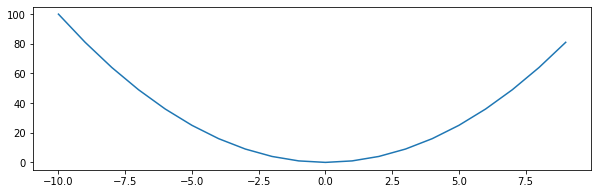

In [6]:
plt.figure(figsize=(10,3))
plt.plot(x,x**2);

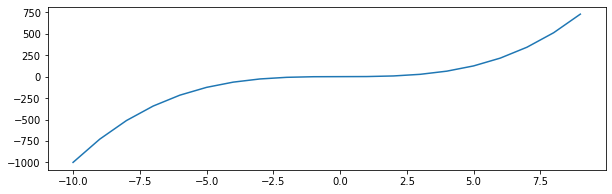

In [7]:
plt.figure(figsize=(10,3))
plt.plot(x,x**3);

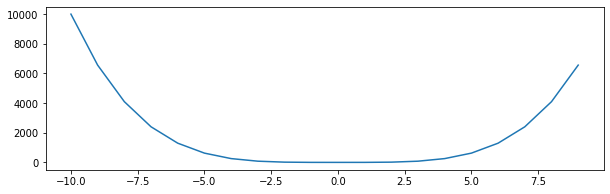

In [8]:
plt.figure(figsize=(10,3))
plt.plot(x,x**4);

In [10]:
df = pd.read_csv(r"E:\PythonCore\datafiles\Position_Salaries.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [12]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
X = df[['Level']].values
X.shape

(10, 1)

In [16]:
y = df['Salary'].values
y.shape

(10,)

In [18]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
from sklearn.metrics import r2_score

In [21]:
yhat = model.predict(X)
r2_score(y, yhat)

0.6690412331929895

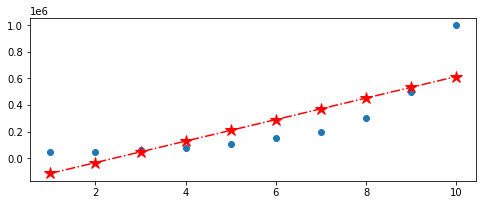

In [33]:
plt.figure(figsize=(8,3))
plt.scatter(df['Level'],y)
plt.plot(df['Level'],yhat, c='r', ls = "-.", marker='*', ms=12)
plt.show()

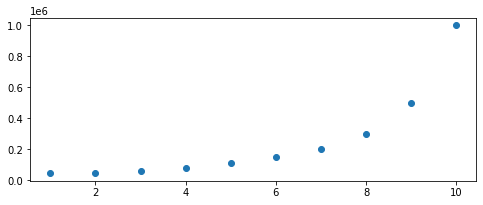

In [34]:
plt.figure(figsize=(8,3))
plt.scatter(df['Level'],y)
plt.show()

In [35]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly2 = PolynomialFeatures(degree=2)
X2 = poly2.fit_transform(X)
X2.shape

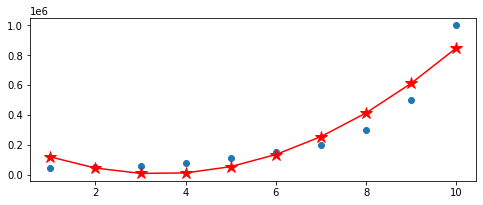

In [47]:
X2

model2 = LinearRegression()
model2.fit(X2,y)
yhat2 = model2.predict(X2)
r2_score(y, yhat2)

plt.figure(figsize=(8,3))
plt.scatter(df['Level'],y)
plt.plot(df['Level'],yhat2, c='r', marker='*', ms=12)
plt.show()

(10, 4)
0.9812097727913367


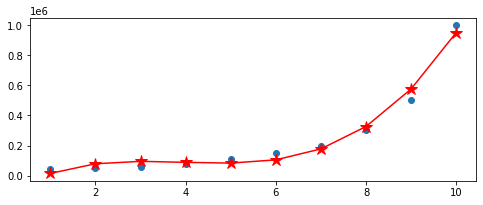

In [48]:
poly3 = PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(X)
print(X3.shape)
model3 = LinearRegression()
model3.fit(X3,y)
yhat3 = model3.predict(X3)
print(r2_score(y, yhat3))

plt.figure(figsize=(8,3))
plt.scatter(df['Level'],y)
plt.plot(df['Level'],yhat3, c='r', marker='*', ms=12)
plt.show()

(10, 5)
0.9973922891706615


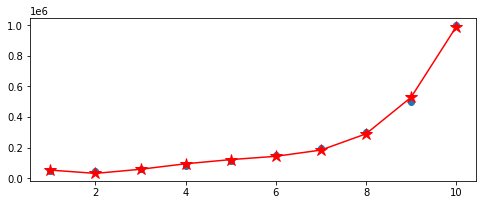

In [52]:
poly4 = PolynomialFeatures(degree=4)
X4 = poly4.fit_transform(X)
print(X4.shape)
model4 = LinearRegression()
model4.fit(X4,y)
yhat4 = model4.predict(X4)
print(r2_score(y, yhat4))

plt.figure(figsize=(8,3))
plt.scatter(df['Level'],y)
plt.plot(df['Level'],yhat4, c='r', marker='*', ms=12)
plt.show()

In [60]:
test_levels = [1.5,2.5,6.5,9.5,11]
test_levels = np.array([1.5,2.5,6.5,9.5,11]).reshape(-1,1)
#model, model2, model3, model4

In [61]:
model.predict(test_levels).round(2)

array([-74015.15,   6863.64, 330378.79, 573015.15, 694333.33])

In [62]:
model2.predict(poly2.transform(test_levels)).round(2)

array([  76581.44,   21437.5 ,  189498.11,  723611.74, 1121833.33])

In [63]:
model3.predict(poly3.transform(test_levels)).round(2)

array([  54333.19,   91272.29,  133259.47,  745859.99, 1475333.33])

In [64]:
model4.predict(poly4.transform(test_levels)).round(2)

array([  33203.22,   42102.55,  158862.45,  724730.02, 1780833.33])

In [65]:
import pickle

In [67]:
f = open('Polymodel.bin', 'wb')
pickle.dump(model3, f)
pickle.dump(poly3,f)
f.close()